In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [356]:
df=pd.read_csv(r'laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [357]:
df.shape

(1303, 12)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [359]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [360]:
df.describe(include='O')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


###  Data Cleaning

In [361]:
df.duplicated().sum()

0

In [362]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [363]:
for i in df.columns:
    print(f'Columns: {i}')
    print(f'Nunique: {df[i].nunique()}')
    print(f'Unique: {df[i].unique()}')
    print(df[i].dtypes)
    print(30*'===')

Columns: Unnamed: 0
Nunique: 1303
Unique: [   0    1    2 ... 1300 1301 1302]
int64
Columns: Company
Nunique: 19
Unique: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
object
Columns: TypeName
Nunique: 6
Unique: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
object
Columns: Inches
Nunique: 18
Unique: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
float64
Columns: ScreenResolution
Nunique: 40
Unique: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Pan

In [364]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [365]:
df['Company']=df.Company.astype('category')

In [366]:
df['TypeName']=df.TypeName.astype('category')

In [367]:
df['touchscreen']=df.ScreenResolution.apply(lambda x : 1 if 'touchscreen' in str(x).lower() else 0 ).astype('int')

In [368]:
df['ScreenResolution1']=df.ScreenResolution.apply(lambda x: x.split()[-1] ).astype('category')
df['ScreenResolution1'].unique()

['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768', ..., '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600']
Length: 15
Categories (15, object): ['1366x768', '1440x900', '1600x900', '1920x1080', ..., '2736x1824', '2880x1800', '3200x1800', '3840x2160']

In [369]:
df['Display']=df.ScreenResolution.apply(lambda x:'Full HD' if 'full hd' in str(x).lower() else('Quad HD+' if 'quad hd+' in str(x).lower() else ('4K Ultra HD+' if '4k ultra hd' in str(x).lower() else('Retina' if 'retina' in str(x).lower() else 'Normal')))).astype('category')

In [370]:
df['cpu_name'] = df.Cpu.apply(lambda x: x.split(' ')[0]).astype('category')
df['cpu_speed_Ghz']= df.Cpu.apply(lambda x: x.split()[-1].strip('GHz')).astype('float')

In [371]:
df['RAM']=df.Ram.apply(lambda x : x.strip('GB')).astype('int')

In [372]:
df['mem_size']=df.Memory.apply(lambda x : x.split()[0].strip('GBT')).apply(lambda x : '1024' if x in ['1','1.0'] else x).apply(lambda x : '2048' if x in '2' else x).astype('int')
df['mem_size'].unique()

array([ 128,  256,  512,  500, 1024,   32,   64, 2048,   16,  180,  240,
          8,  508])

In [373]:
df['mem_type']=df.Memory.apply(lambda x : x.split()[1]).astype('category')
df['mem_type'].unique()

['SSD', 'Flash', 'HDD', 'Hybrid']
Categories (4, object): ['Flash', 'HDD', 'Hybrid', 'SSD']

In [374]:
df['extra_mem']=df.Memory.apply(lambda x: x.split('+')[1].strip() if '+' in str(x) else '0').apply(lambda x : x.split()[0].strip('GB')).apply(lambda x : '1024' if x in ['1T','1.0T'] else x).apply(lambda x : '2048' if x in '2T' else x).astype('int')
df.extra_mem.unique()

array([   0, 1024,  256, 2048,  500,  512])

In [375]:
df['extra_mem_type']=df.Memory.apply(lambda x: x.split('+')[1].strip() if '+' in str(x) else '0').apply(lambda x : x.split()[1] if ' ' in str(x) else 'None').astype('category')
df['extra_mem_type'].unique()

['None', 'HDD', 'SSD', 'Hybrid']
Categories (4, object): ['HDD', 'Hybrid', 'None', 'SSD']

In [376]:
df['gpu_brand']=df.Gpu.apply(lambda x: x.split()[0]).astype('category')
df.gpu_brand.unique()

['Intel', 'AMD', 'Nvidia', 'ARM']
Categories (4, object): ['AMD', 'ARM', 'Intel', 'Nvidia']

In [377]:
df['operte_sys']=df.OpSys.apply(lambda x:'Windows' if 'Windows' in x else ('Mac' if 'mac' in x.lower() else x)).astype('category')

In [378]:
df['weight']=df.Weight.apply(lambda x: x.strip('kg') if 'kg' in str(x).lower() else x).astype(float)

In [379]:
df['Price']=df.Price.apply(lambda x : round(x,2))

In [380]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'touchscreen',
       'ScreenResolution1', 'Display', 'cpu_name', 'cpu_speed_Ghz', 'RAM',
       'mem_size', 'mem_type', 'extra_mem', 'extra_mem_type', 'gpu_brand',
       'operte_sys', 'weight'],
      dtype='object')

In [381]:
df2=df.drop(['ScreenResolution', 'Cpu', 'Ram','Memory', 'Gpu', 'OpSys', 'Weight'],axis=1)
df2.head()

,Company,TypeName,Inches,Price,touchscreen,ScreenResolution1,Display,cpu_name,cpu_speed_Ghz,RAM,mem_size,mem_type,extra_mem,extra_mem_type,gpu_brand,operte_sys,weight
0,Apple,Ultrabook,13.3,71378.68,0,2560x1600,Retina,Intel,2.3,8,128,SSD,0,None,Intel,Mac,1.37
1,Apple,Ultrabook,13.3,47895.52,0,1440x900,Normal,Intel,1.8,8,128,Flash,0,None,Intel,Mac,1.34
2,HP,Notebook,15.6,30636.00,0,1920x1080,Full HD,Intel,2.5,8,256,SSD,0,None,Intel,No OS,1.86
3,Apple,Ultrabook,15.4,135195.34,0,2880x1800,Retina,Intel,2.7,16,512,SSD,0,None,AMD,Mac,1.83
4,Apple,Ultrabook,13.3,96095.81,0,2560x1600,Retina,Intel,3.1,8,256,SSD,0,None,Intel,Mac,1.37


In [382]:
df3=df2.copy(deep=True)

In [383]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   TypeName           1303 non-null   category
 2   Inches             1303 non-null   float64 
 3   Price              1303 non-null   float64 
 4   touchscreen        1303 non-null   int32   
 5   ScreenResolution1  1303 non-null   category
 6   Display            1303 non-null   category
 7   cpu_name           1303 non-null   category
 8   cpu_speed_Ghz      1303 non-null   float64 
 9   RAM                1303 non-null   int32   
 10  mem_size           1303 non-null   int32   
 11  mem_type           1303 non-null   category
 12  extra_mem          1303 non-null   int32   
 13  extra_mem_type     1303 non-null   category
 14  gpu_brand          1303 non-null   category
 15  operte_sys         1303 non-null   category
 16  weight

<Axes: >

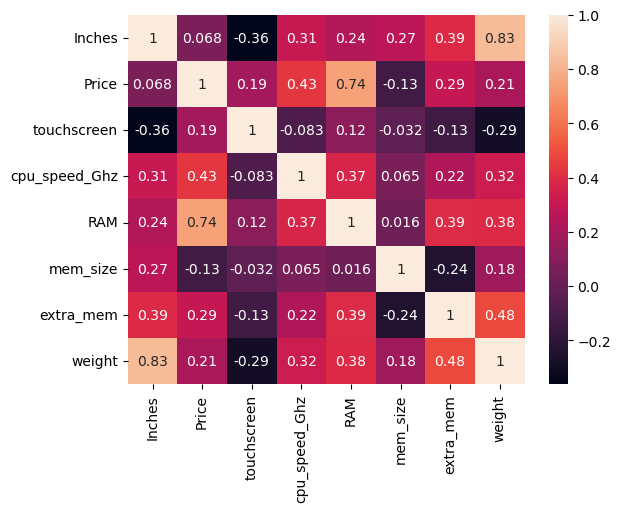

In [384]:
sns.heatmap(df2.corr(numeric_only=True),annot=True)

In [385]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Company            1303 non-null   category
 1   TypeName           1303 non-null   category
 2   Inches             1303 non-null   float64 
 3   Price              1303 non-null   float64 
 4   touchscreen        1303 non-null   int32   
 5   ScreenResolution1  1303 non-null   category
 6   Display            1303 non-null   category
 7   cpu_name           1303 non-null   category
 8   cpu_speed_Ghz      1303 non-null   float64 
 9   RAM                1303 non-null   int32   
 10  mem_size           1303 non-null   int32   
 11  mem_type           1303 non-null   category
 12  extra_mem          1303 non-null   int32   
 13  extra_mem_type     1303 non-null   category
 14  gpu_brand          1303 non-null   category
 15  operte_sys         1303 non-null   category
 16  weight

In [386]:
df_num=df2.iloc[:,[3,2,4,8,9,10,12,16]]


In [387]:
df2=df3.copy(deep=True)

<Axes: ylabel='Density'>

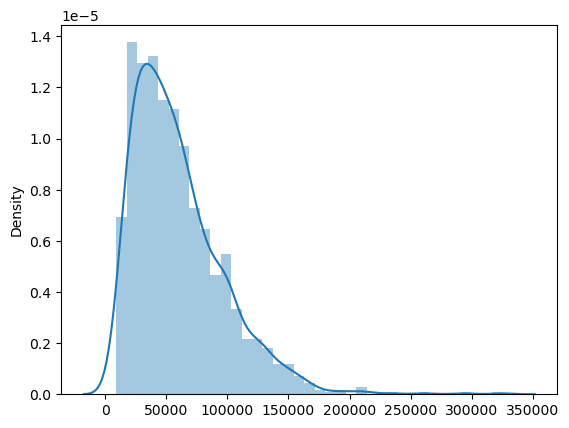

In [388]:
sns.distplot(x=df2.Price)

In [389]:
df2.Price=np.log(df2.Price)

<Axes: ylabel='Density'>

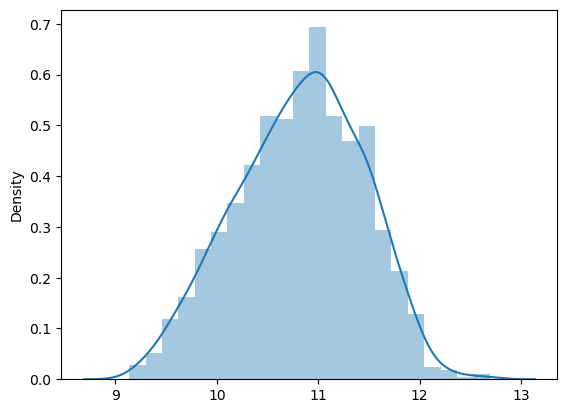

In [390]:
sns.distplot(x=df2.Price)

Columns: Price


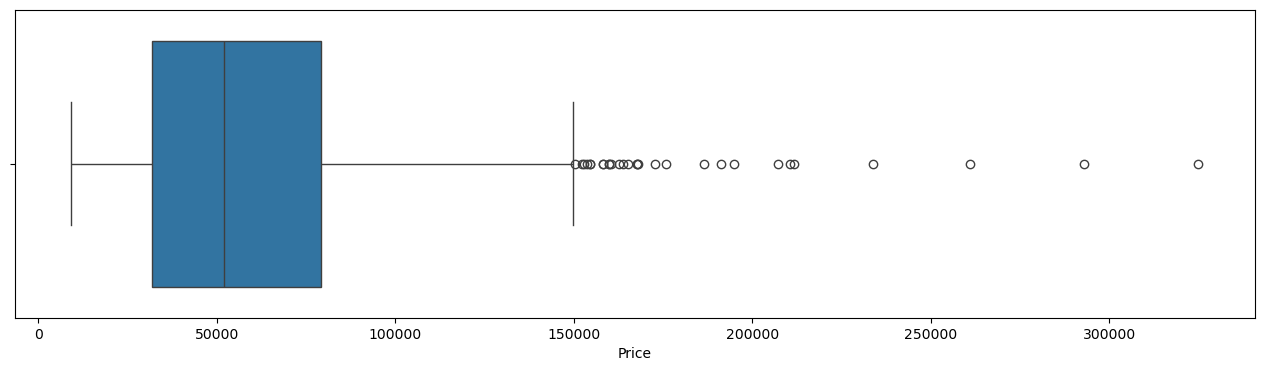

Columns: Inches


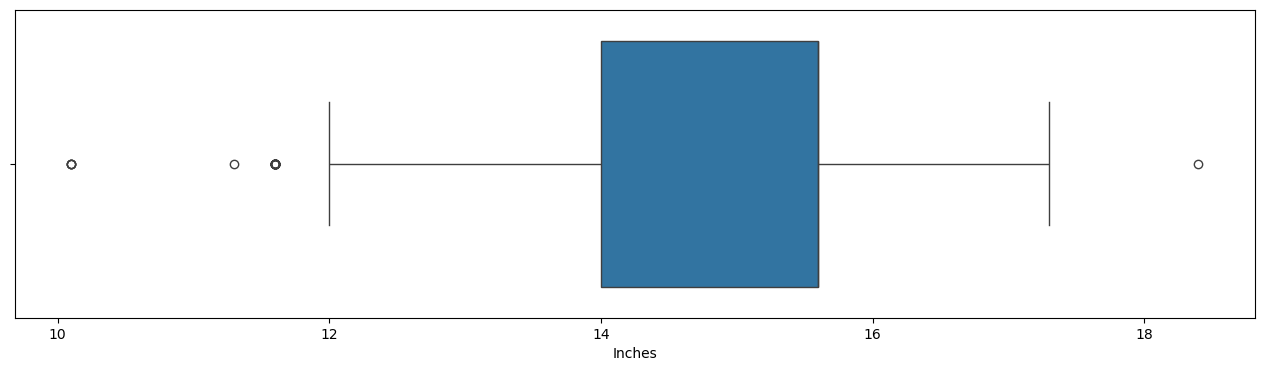

Columns: touchscreen


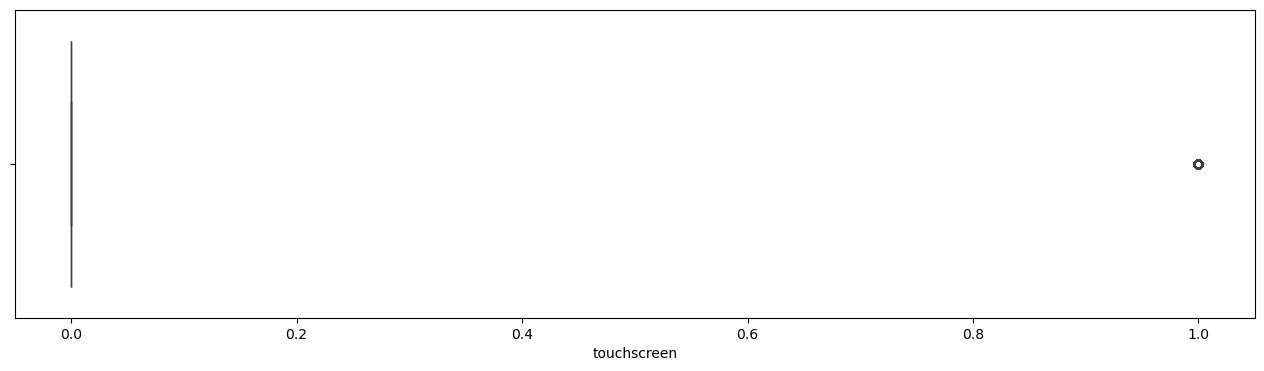

Columns: cpu_speed_Ghz


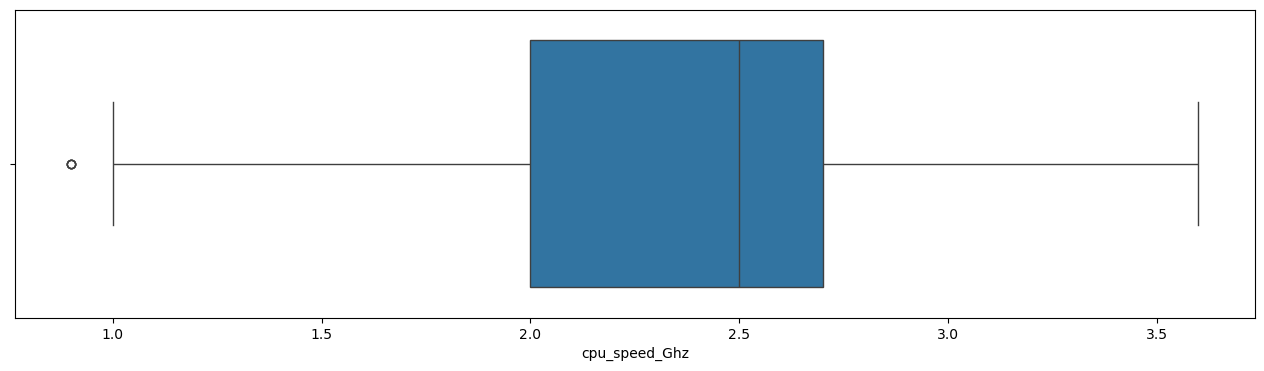

Columns: RAM


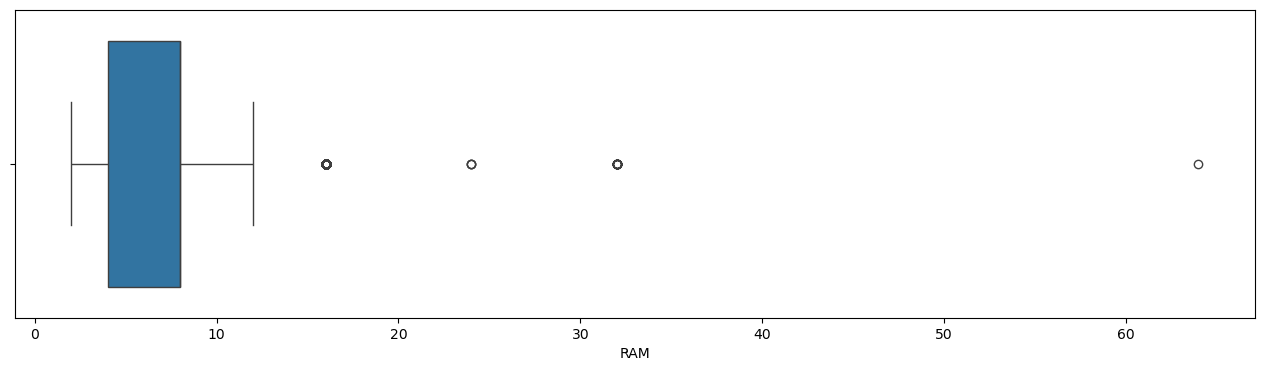

Columns: mem_size


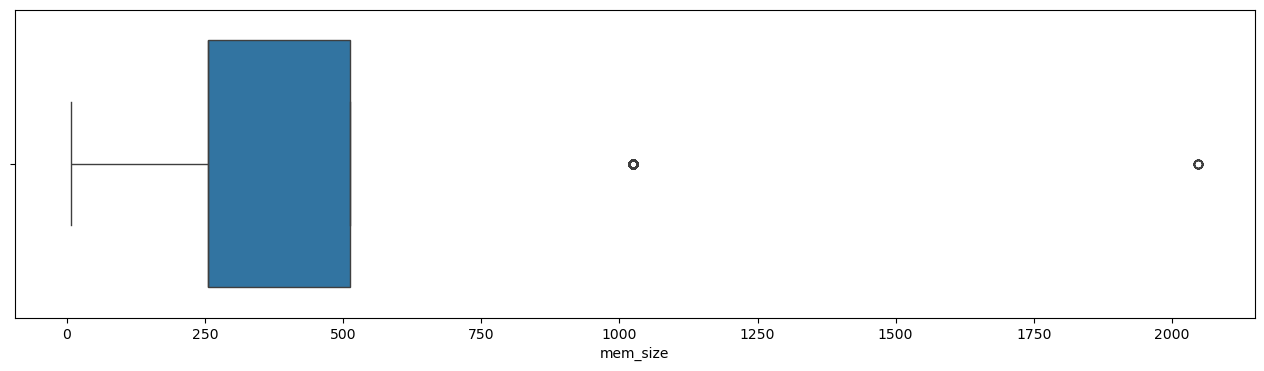

Columns: extra_mem


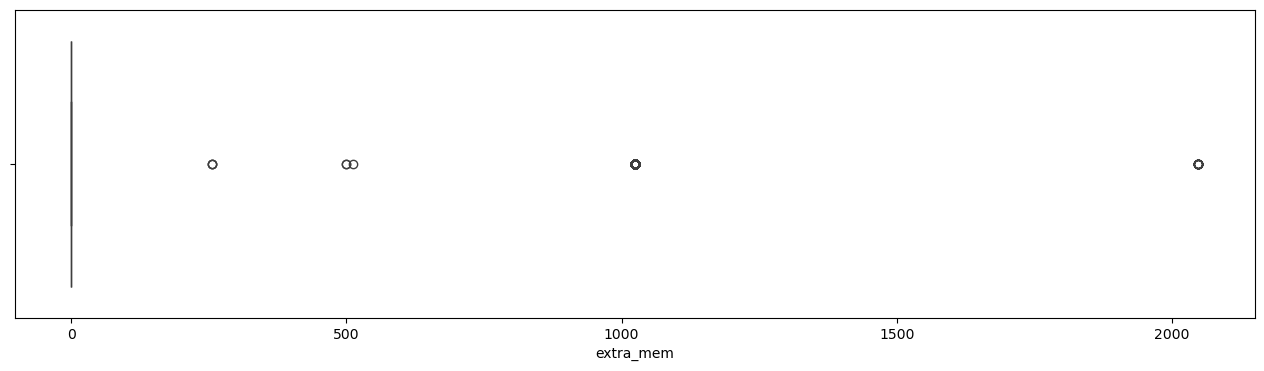

Columns: weight


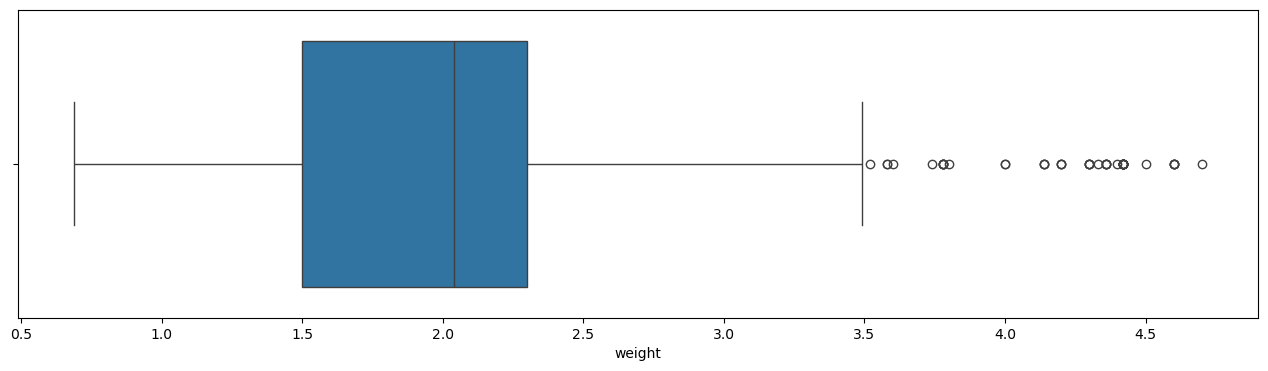

In [391]:
for i in df_num:
    print(f'Columns: {i}')
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df_num[i],data=df_num)
    plt.show()

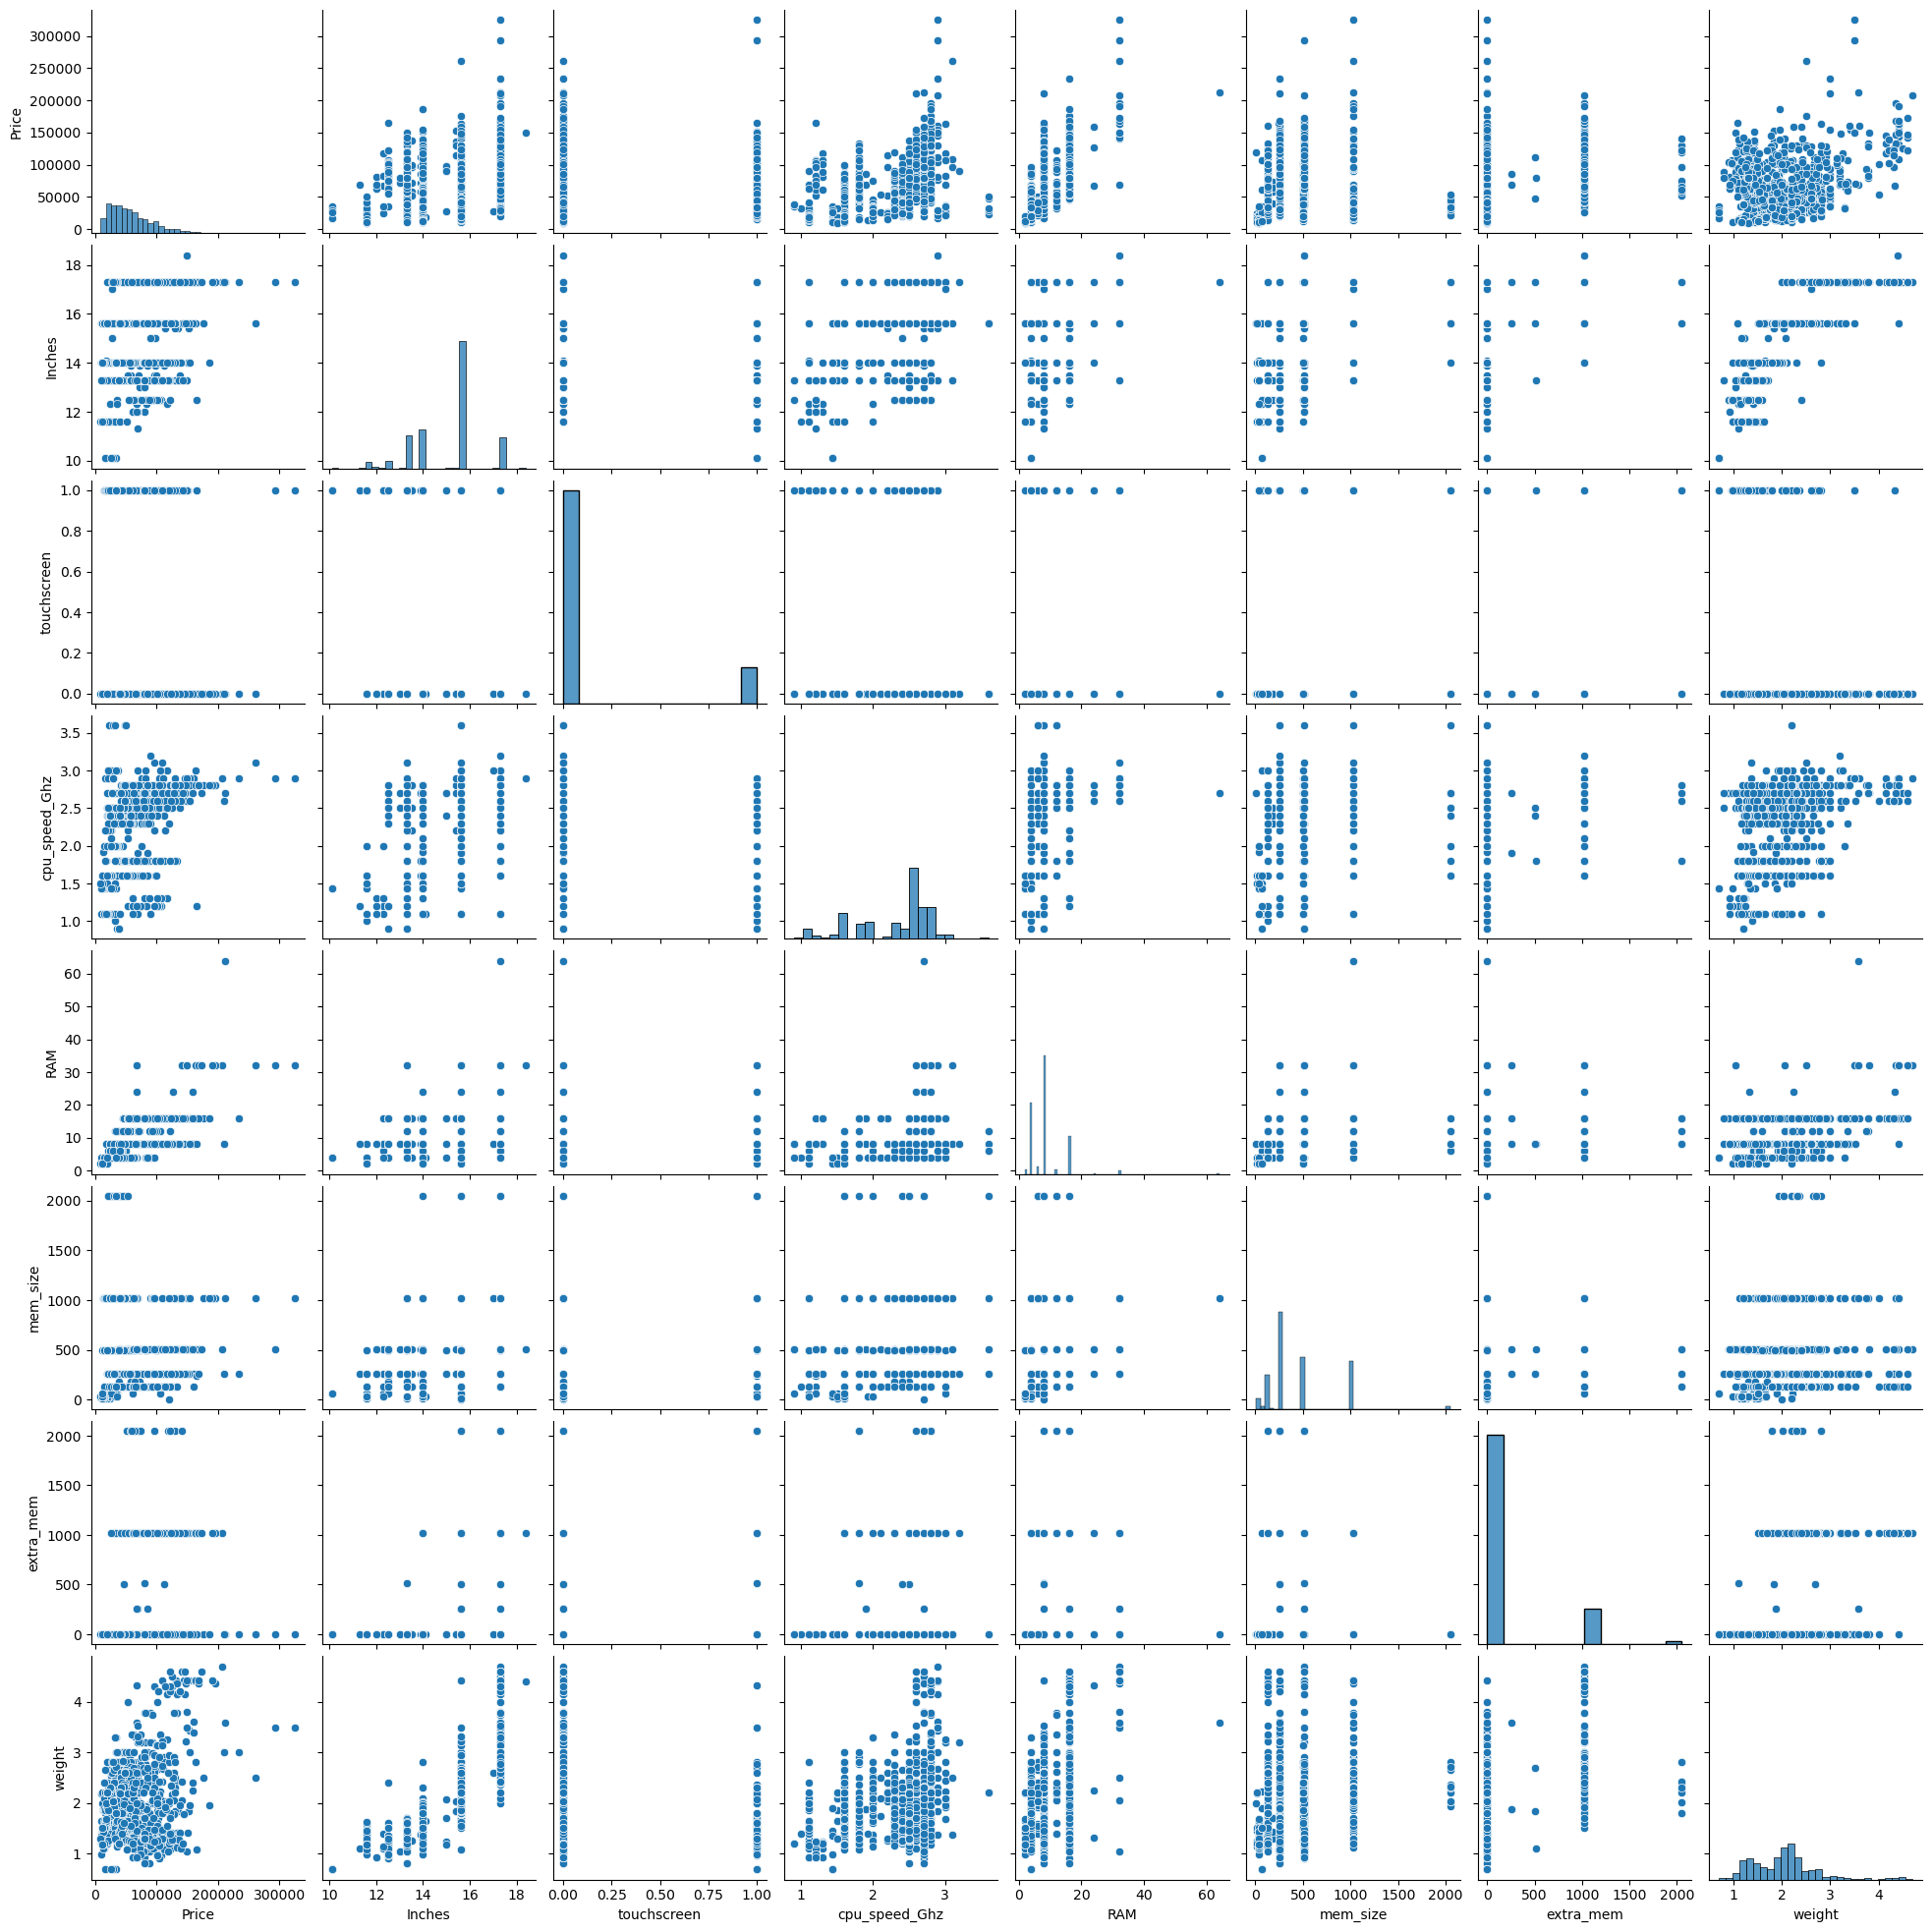

In [392]:
sns.pairplot(df_num)

In [393]:
df_num.columns

Index(['Price', 'Inches', 'touchscreen', 'cpu_speed_Ghz', 'RAM', 'mem_size',
       'extra_mem', 'weight'],
      dtype='object')

In [394]:
df_cat=df2.drop(['Price','Inches', 'touchscreen', 'cpu_speed_Ghz', 'RAM', 'mem_size','extra_mem','weight'],axis=1)
df_cat

,Company,TypeName,ScreenResolution1,Display,cpu_name,mem_type,extra_mem_type,gpu_brand,operte_sys
0,Apple,Ultrabook,2560x1600,Retina,Intel,SSD,None,Intel,Mac
1,Apple,Ultrabook,1440x900,Normal,Intel,Flash,None,Intel,Mac
2,HP,Notebook,1920x1080,Full HD,Intel,SSD,None,Intel,No OS
3,Apple,Ultrabook,2880x1800,Retina,Intel,SSD,None,AMD,Mac
4,Apple,Ultrabook,2560x1600,Retina,Intel,SSD,None,Intel,Mac
...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,1920x1080,Full HD,Intel,SSD,None,Intel,Windows
1299,Lenovo,2 in 1 Convertible,3200x1800,Quad HD+,Intel,SSD,None,Intel,Windows
1300,Lenovo,Notebook,1366x768,Normal,Intel,Flash,None,Intel,Windows
1301,HP,Notebook,1366x768,Normal,Intel,HDD,None,AMD,Windows


Column: Company


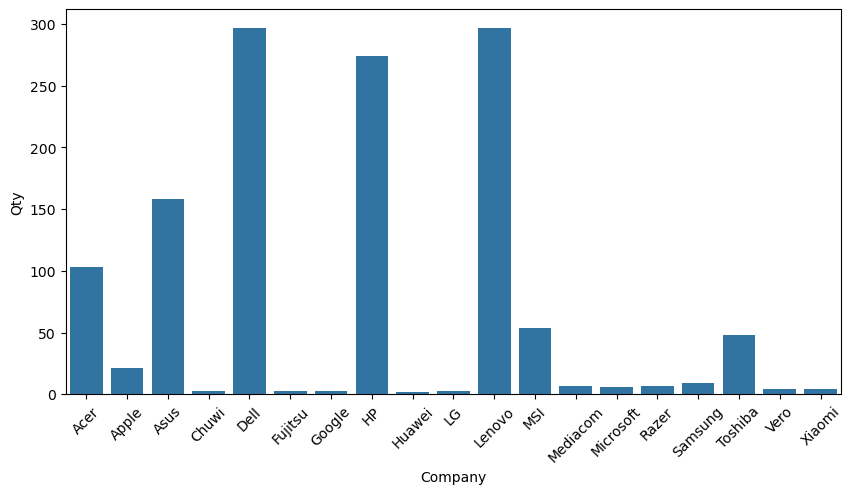

Column: TypeName


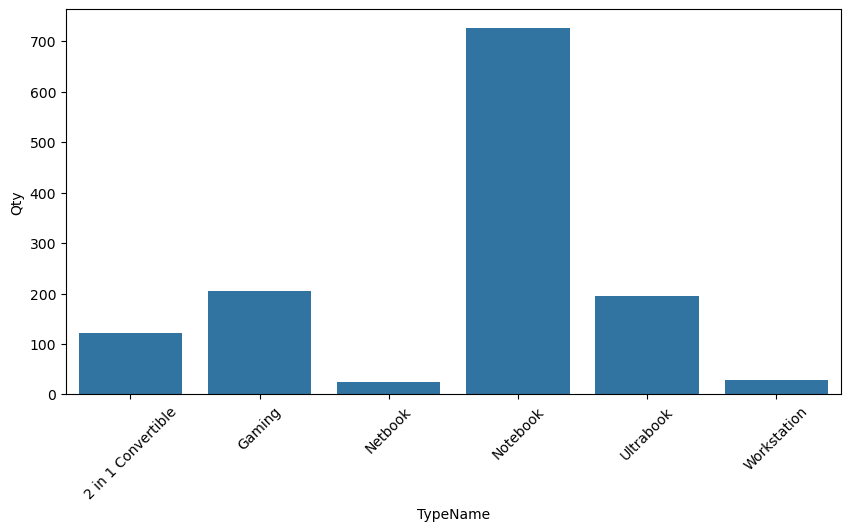

Column: ScreenResolution1


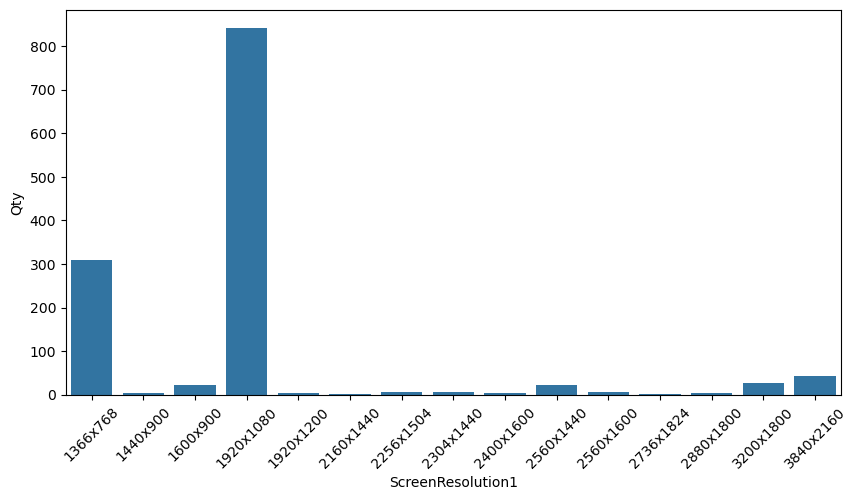

Column: Display


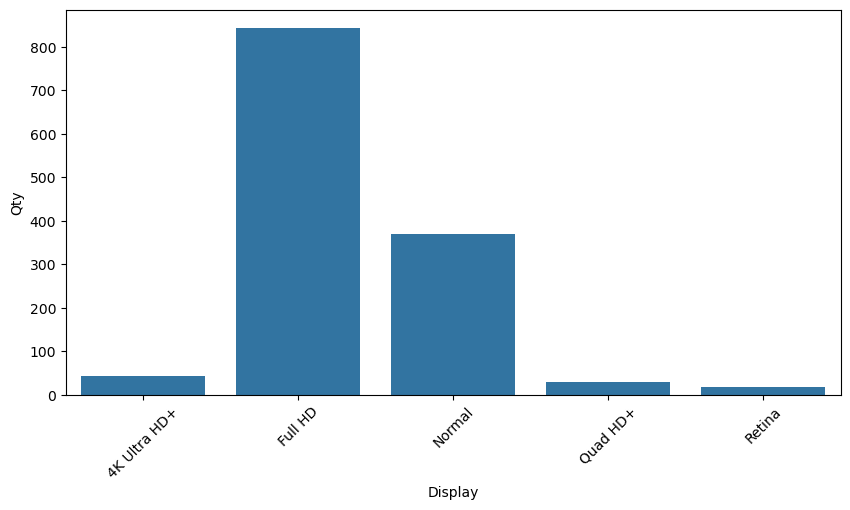

Column: cpu_name


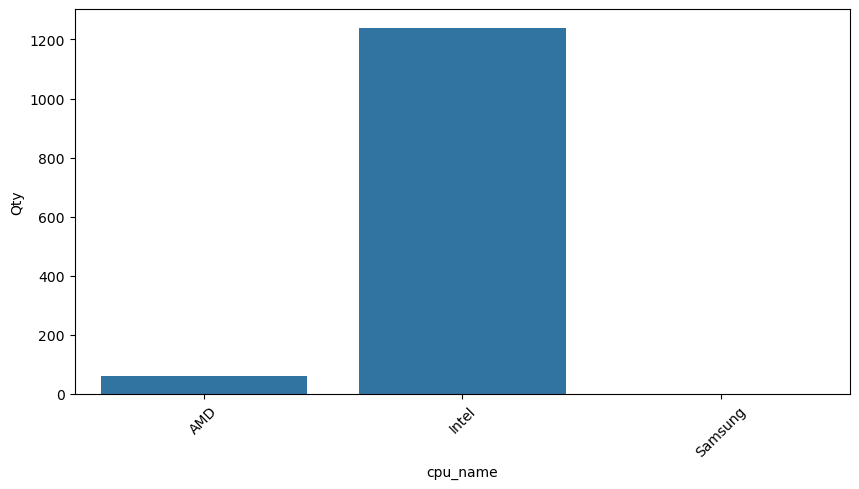

Column: mem_type


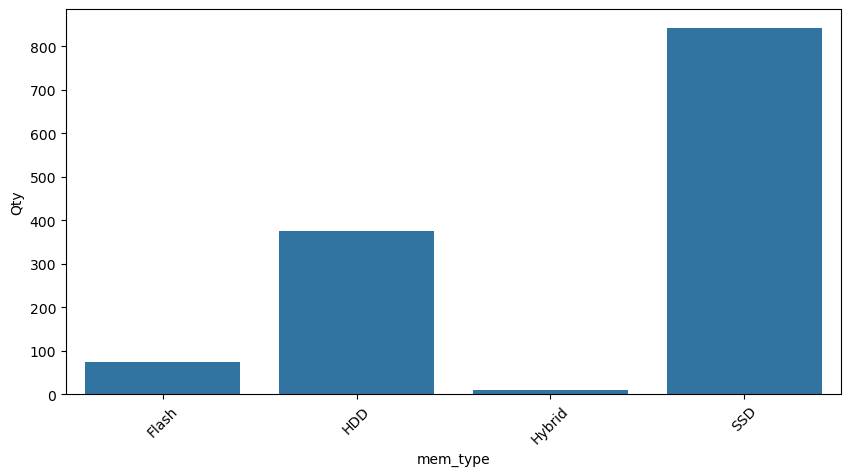

Column: extra_mem_type


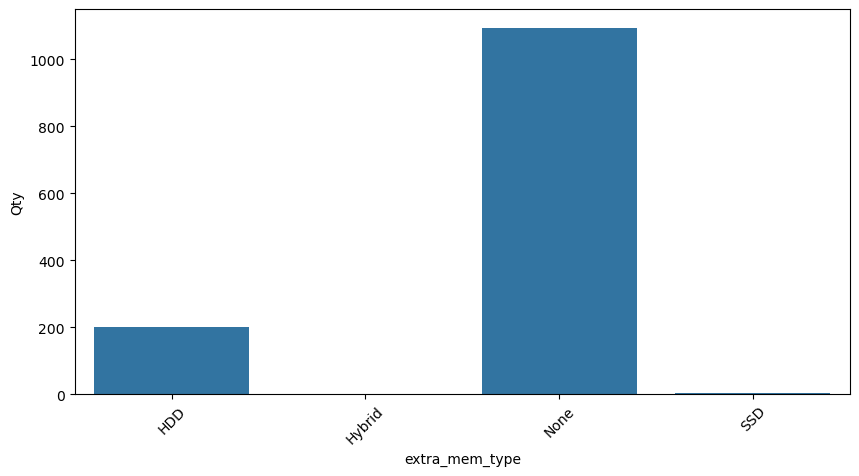

Column: gpu_brand


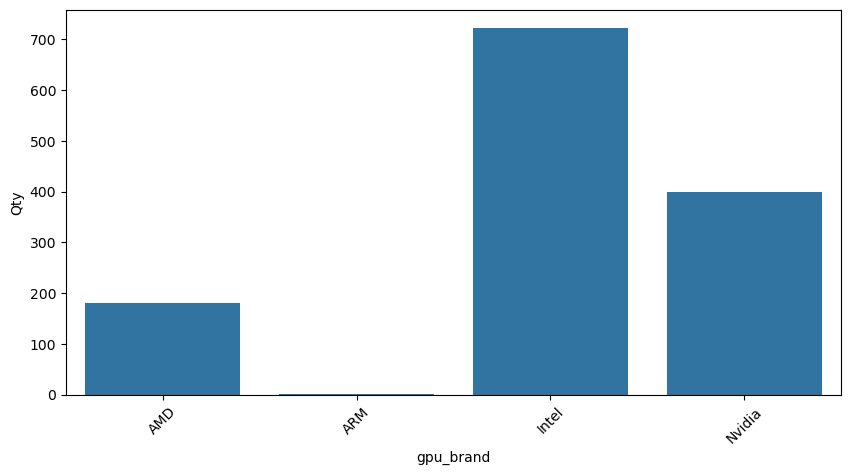

Column: operte_sys


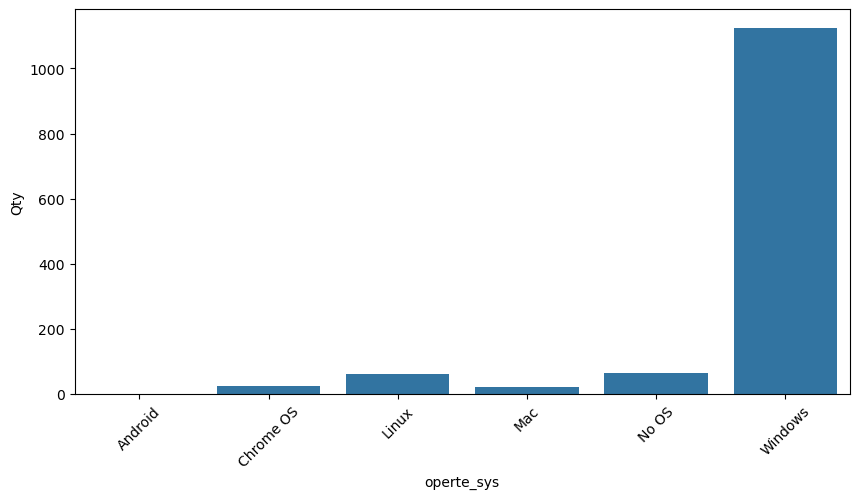

In [395]:
for i in df_cat.columns:
    print(f'Column: {i}')
    fig, ax  = plt.subplots(figsize=(10,5))
    sns.countplot(x=df_cat[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.ylabel('Qty')
    plt.show()

Column: Company


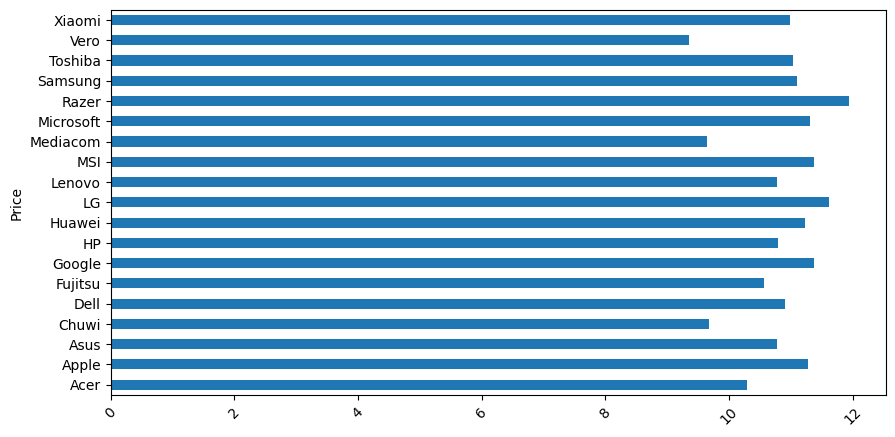

Column: TypeName


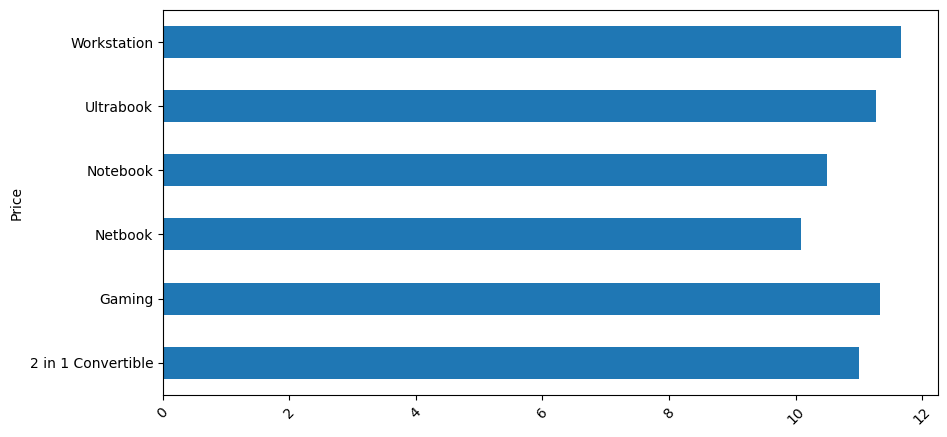

Column: ScreenResolution1


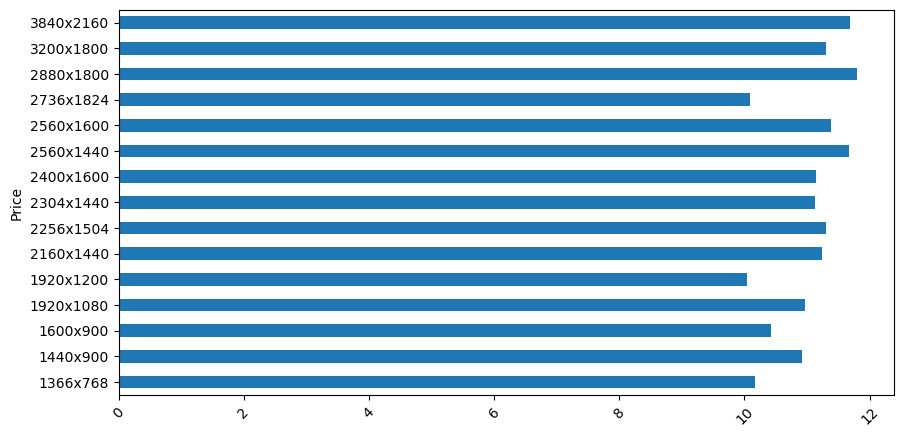

Column: Display


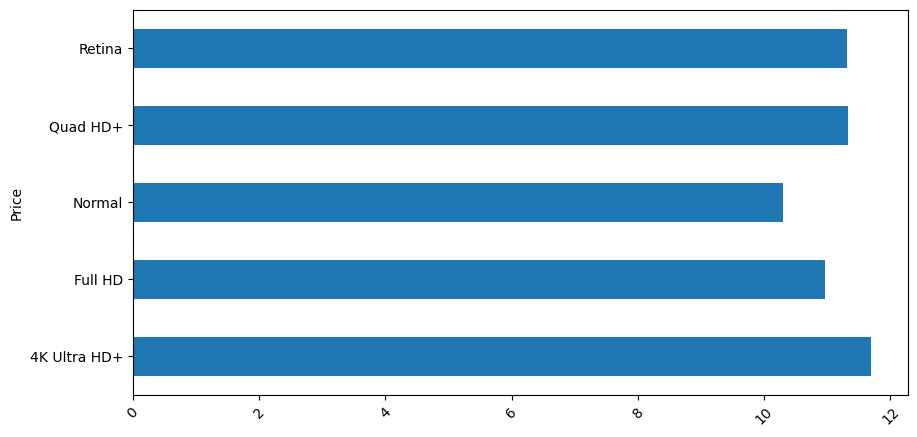

Column: cpu_name


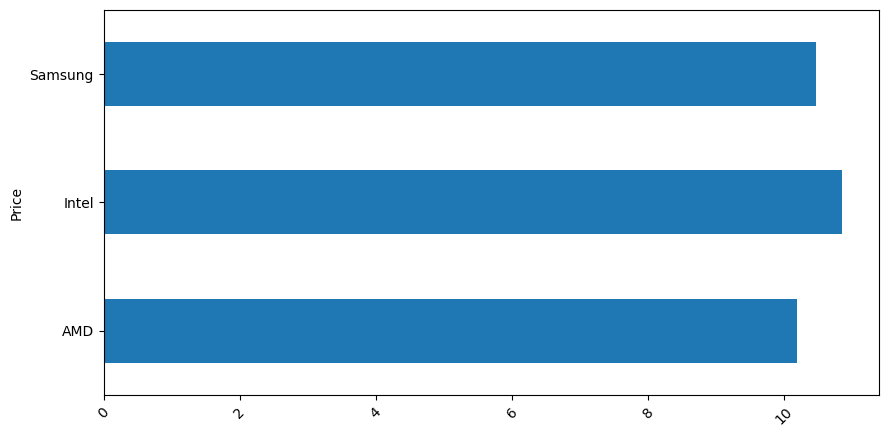

Column: mem_type


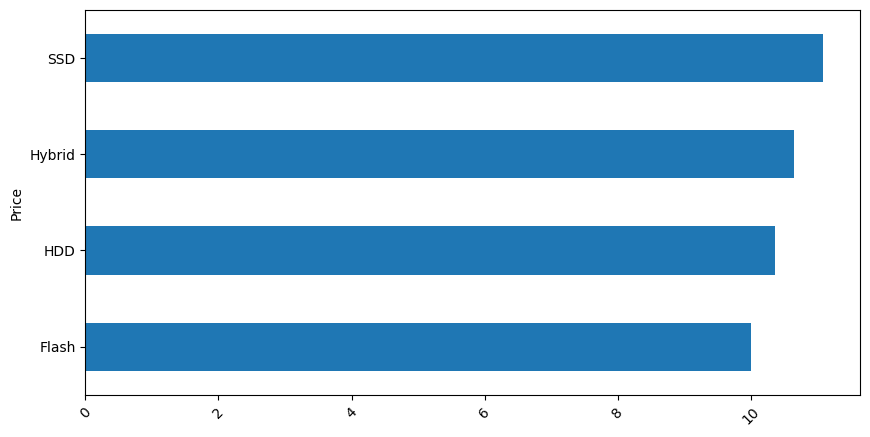

Column: extra_mem_type


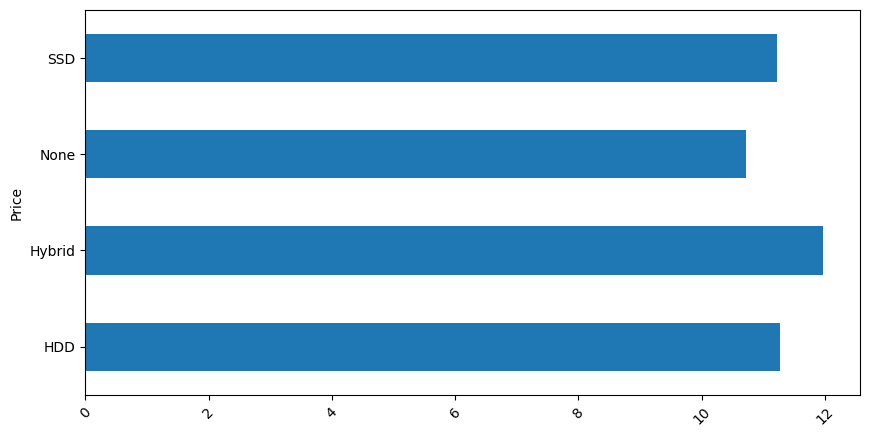

Column: gpu_brand


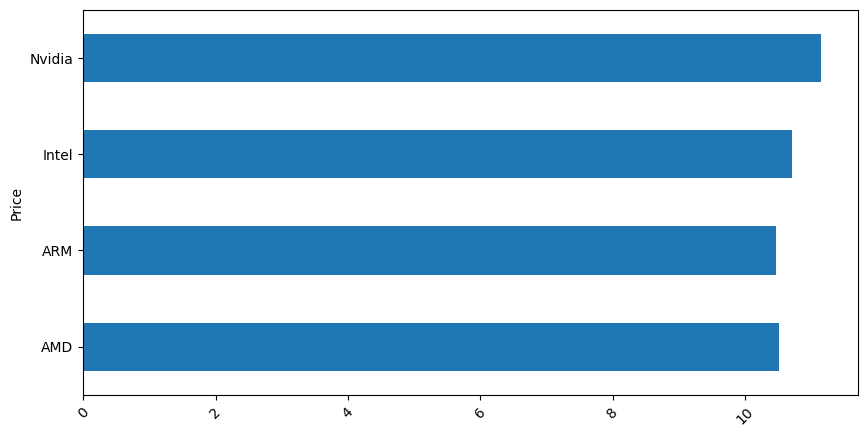

Column: operte_sys


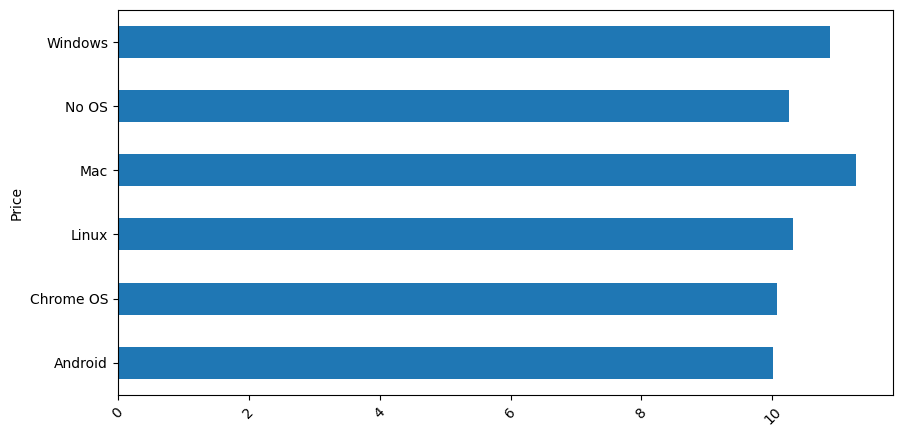

In [396]:
for i in df_cat.columns:
    print(f'Column: {i}')
    fig, ax  = plt.subplots(figsize=(10,5))
    df2.groupby(i)['Price'].mean().plot(kind='barh')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.ylabel('Price')
    plt.show()

In [397]:
df2.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
Name: Company, dtype: int64

In [403]:
df2.drop_duplicates(keep='first',inplace=True)

In [404]:
df2.shape

(1273, 17)

In [405]:
from sklearn.preprocessing import LabelEncoder

In [406]:
label_encoder = LabelEncoder()

In [408]:
columns_to_encode = df_cat.columns
columns_to_encode

Index(['Company', 'TypeName', 'ScreenResolution1', 'Display', 'cpu_name',
       'mem_type', 'extra_mem_type', 'gpu_brand', 'operte_sys'],
      dtype='object')

In [409]:
df2[columns_to_encode] = df[columns_to_encode].apply(label_encoder.fit_transform)
df2

,Company,TypeName,Inches,Price,touchscreen,ScreenResolution1,Display,cpu_name,cpu_speed_Ghz,RAM,mem_size,mem_type,extra_mem,extra_mem_type,gpu_brand,operte_sys,weight
0,1,4,13.3,11.175755,0,10,4,1,2.3,8,128,3,0,2,2,3,1.37
1,1,4,13.3,10.776777,0,1,2,1,1.8,8,128,0,0,2,2,3,1.34
2,7,3,15.6,10.329931,0,3,1,1,2.5,8,256,3,0,2,2,4,1.86
3,1,4,15.4,11.814476,0,12,4,1,2.7,16,512,3,0,2,0,3,1.83
4,1,4,13.3,11.473101,0,10,4,1,3.1,8,256,3,0,2,2,3,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2,3,15.6,10.555257,0,0,2,1,2.5,4,500,1,0,2,3,5,2.20
1270,10,0,14.0,10.433899,1,3,1,1,2.5,4,128,3,0,2,2,5,1.80
1271,10,0,13.3,11.288115,1,13,3,1,2.5,16,512,3,0,2,2,5,1.30
1272,10,3,14.0,9.409283,0,0,2,1,1.6,2,64,0,0,2,2,5,1.50


In [412]:
from sklearn.model_selection import train_test_split

X = df2.drop('Price', axis=1)
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [414]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [418]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [433]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [434]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [436]:
for i in range(len(models)):
    models[i].fit(X_train,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train)
    y_pred_test=models[i].predict(X_test)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()

LinearRegression(): 
MSE_train:  0.1016550795734789
MSE_test:  0.10599823901246966
RMSE_train:  0.3188339372988373
RMSE_test:  0.3255737074956601
R2_score_train:  0.74271618486568
R2_score_test:  0.6857562347242135

DecisionTreeRegressor(): 
MSE_train:  0.0012550893594601147
MSE_test:  0.07665140625865421
RMSE_train:  0.03542724035908124
RMSE_test:  0.2768599036672776
R2_score_train:  0.9968234329254253
R2_score_test:  0.7727582388083838

RandomForestRegressor(): 
MSE_train:  0.007431991838292964
MSE_test:  0.04786359950859911
RMSE_train:  0.08620900091227693
RMSE_test:  0.2187775114325033
R2_score_train:  0.9811900081901859
R2_score_test:  0.8581029470926865



**Linear Regression**
* The R-squared score on the training set (0.7427) is slightly higher than that on the testing set (0.6858). This indicates that the model performs better on the training data compared to the testing data. While the R-squared scores are not drastically different, there is a drop in performance on the testing set, suggesting some degree of overfitting.

**Decision Tree Regressor**
* The extremely high R-squared score on the training set compared to the testing set suggests that the Decision Tree model may be overfitting the training data.

**Random Forest Regressor**
* The RandomForestRegressor model performs very well, with high R-squared scores on both the training and testing sets. Compared to the DecisionTreeRegressor, the RandomForestRegressor model achieves a significantly lower R-squared score on the training set, indicating less overfitting. 